# 04. 자동 미분

In [49]:
import torch

In [50]:
x = torch.ones(3, requires_grad=True)
print(x)
# print(x.grad)
# print(x.grad_fn)
print(x.requires_grad)


tensor([1., 1., 1.], requires_grad=True)
True


In [51]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\MSI\AppData\Local\Temp\ipykernel_6084\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [52]:
z = y ** 2
print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
None
True


C:\Users\MSI\AppData\Local\Temp\ipykernel_6084\736045219.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(z.grad)


## 4-2 backword
- x -> y -> z 계산을 역전파를 통해 기울기를 구함

In [53]:
result = z.sum()
result = result.backward()


In [54]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3 no_grad()
- 역전파를 중지

In [61]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print(x.requires_grad)
    print((x ** 2).requires_grad)


True
True
True
False


## 4-4 detach()

In [64]:
y.detach()

tensor(1.)

In [ ]:
import torch

def loss_fn(output, target):
    return ((output - target) ** 2).mean() 

learning_rate = 0.01

class SimpleModel(torch.nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.W = torch.randn(10, 1, requires_grad=True)  
        self.b = torch.zeros(1, requires_grad=True) 

    def forward(self, x):
        return torch.matmul(x, self.W) + self.b

model = SimpleModel()
x = torch.randn(32, 10)  
target = torch.randn(32, 1) 

for epoch in range(100):
    output = model(x)  
    loss = loss_fn(output, target)  
    
    loss.backward()  
    with torch.no_grad():  
        model.W -= learning_rate * model.W.grad  
        model.b -= learning_rate * model.b.grad  
        model.W.grad.zero_()  
        model.b.grad.zero_()  

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


In [66]:
import torch
import torch.nn as nn

# 간단한 모델 정의
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # 입력 10, 출력 5
        self.fc2 = nn.Linear(5, 1)   # 입력 5, 출력 1

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleModel()

# 입력 데이터 (배치 32, 특성 10개)
inputs = torch.randn(32, 10)

# 1. 예측을 위한 no_grad() 사용 (기울기 계산을 하지 않음)
with torch.no_grad():  # 기울기 계산을 하지 않음
    outputs = model(inputs)  # 예측

# 예측 결과 출력
print(outputs)


tensor([[-0.4164],
        [-0.4358],
        [-0.4384],
        [-0.6584],
        [-0.2120],
        [-0.4825],
        [-0.2710],
        [-0.3579],
        [-0.2568],
        [-0.2820],
        [-0.2480],
        [-0.6343],
        [-0.4240],
        [-0.3426],
        [-0.3287],
        [-0.7351],
        [-0.3838],
        [-0.2979],
        [-0.2974],
        [-0.4048],
        [-0.2858],
        [-0.3965],
        [-0.2794],
        [-0.4703],
        [-0.3622],
        [-0.3062],
        [-0.3907],
        [-0.3946],
        [-0.2858],
        [-0.3010],
        [-0.4191],
        [-0.3150]])


In [67]:
import torch

class SimpleModel:
    def __init__(self, input_size, hidden_size, output_size):
        # 가중치와 편향을 수동으로 초기화
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)  # 입력에서 은닉층으로 가는 가중치
        self.b1 = torch.zeros(hidden_size, requires_grad=True)  # 은닉층 편향
        self.W2 = torch.randn(hidden_size, output_size, requires_grad=True)  # 은닉층에서 출력층으로 가는 가중치
        self.b2 = torch.zeros(output_size, requires_grad=True)  # 출력층 편향

    def forward(self, x):
        # 신경망의 순전파(Forward Propagation)
        hidden = torch.relu(torch.matmul(x, self.W1) + self.b1)  # 은닉층 계산 (ReLU 활성화)
        output = torch.matmul(hidden, self.W2) + self.b2  # 출력층 계산
        return output

model = SimpleModel(10, 5, 1)
inputs = torch.randn(32, 10)

# 예측
with torch.no_grad():  # 기울기 계산을 하지 않음
    outputs = model.forward(inputs)  # 예측 수행

# 예측 결과 출력
print(outputs)


tensor([[-1.5965e+00],
        [ 3.6589e+00],
        [-1.9263e+00],
        [ 3.3768e+00],
        [ 6.2995e-01],
        [ 3.7527e+00],
        [-2.1063e+00],
        [-3.8126e+00],
        [-2.9163e+00],
        [ 1.3151e+00],
        [-2.6382e+00],
        [-3.5802e+00],
        [ 4.8295e+00],
        [-8.5034e-03],
        [-2.3992e+00],
        [ 2.1798e+00],
        [ 9.2690e-01],
        [ 1.7717e+00],
        [ 1.0630e+00],
        [-2.6990e-01],
        [-1.1216e+00],
        [ 2.4331e-02],
        [-3.2089e-01],
        [-1.7562e+00],
        [-1.8912e+00],
        [-9.4712e+00],
        [-3.1873e+00],
        [ 8.1710e-01],
        [ 1.1252e+00],
        [-5.0490e+00],
        [ 1.1437e+00],
        [-1.1852e+00]])


In [74]:
import torch

class SimpleModel:
    def __init__(self, input_size, hidden_size, output_size):
        # 가중치와 편향을 수동으로 초기화
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)  # 입력에서 은닉층으로 가는 가중치
        self.b1 = torch.zeros(hidden_size, requires_grad=True)  # 은닉층 편향
        self.W2 = torch.randn(hidden_size, output_size, requires_grad=True)  # 은닉층에서 출력층으로 가는 가중치
        self.b2 = torch.zeros(output_size, requires_grad=True)  # 출력층 편향

    def forward(self, x):
        # 신경망의 순전파(Forward Propagation)
        hidden = torch.relu(torch.matmul(x, self.W1) + self.b1)  # 은닉층 계산 (ReLU 활성화)
        output = torch.matmul(hidden, self.W2) + self.b2  # 출력층 계산
        return output

# 모델 초기화
model = SimpleModel(10, 5, 1)

# 입력 데이터 (배치 크기: 32, 특성: 10개)
inputs = torch.randn(32, 10)
targets = torch.randn(32, 1)  # 목표값

# 손실 함수 정의: 평균 제곱 오차 (MSE)
def mean_squared_error(output, target):
    return ((output - target) ** 2).mean()

# 예측
with torch.no_grad():  # 기울기 계산을 하지 않음
    outputs = model.forward(inputs)  # 예측 수행

# 손실 계산
loss = mean_squared_error(outputs, targets)


print(outputs)
print(f"Loss: {loss.item()}")


tensor([[-0.8909],
        [-5.3776],
        [ 4.5066],
        [-4.9517],
        [ 6.7068],
        [-3.0377],
        [ 5.2263],
        [ 6.5428],
        [16.5172],
        [-1.0309],
        [-6.3813],
        [ 9.4671],
        [-0.3162],
        [ 7.2339],
        [10.0748],
        [-0.6671],
        [ 0.4907],
        [-0.5938],
        [-7.5720],
        [12.3305],
        [ 6.4296],
        [ 0.4095],
        [-0.4527],
        [ 2.5514],
        [-4.2244],
        [ 6.7332],
        [ 7.8431],
        [ 4.0422],
        [ 4.8327],
        [ 2.2946],
        [ 7.0612],
        [-0.6889]])
Loss: 37.815528869628906


## 선형회귀 연습
- 입출력 정의
- 모델 정의
- 손실함수 정의 : MSE. MAE ....
- 가중치 업데이트 : 경사하강법 -> 어떤거 사용할지 선택
- 학습 반복
- 결과 시각화

In [83]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 38.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.8 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


Epoch [50/400], Loss:  8.4722
Epoch [100/400], Loss:  8.3060
Epoch [150/400], Loss:  8.2050
Epoch [200/400], Loss:  8.1436
Epoch [250/400], Loss:  8.1062
Epoch [300/400], Loss:  8.0835
Epoch [350/400], Loss:  8.0697
Epoch [400/400], Loss:  8.0613


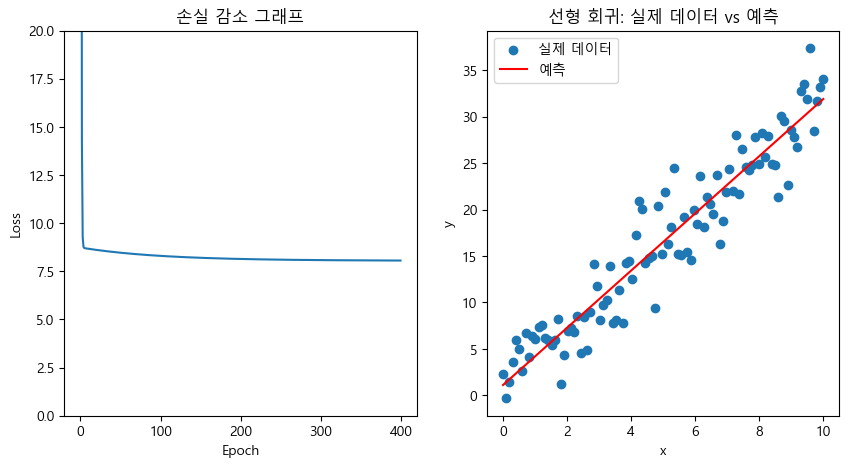

모델 파라미터
linear.weight: tensor([[3.0770]])
linear.bias: tensor([1.1215])


In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='Malgun Gothic') 

x = torch.linspace(0, 10, 100).view(-1, 1)
y = 3 * x + 2 + torch.randn(100, 1) * 3

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)
    
model = LinearRegressionModel()

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 400
losses = []
for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x) # 순전파
    loss = loss_function(outputs, y) # 손실계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}')

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("손실 감소 그래프")
plt.ylim(0, 20)
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="실제 데이터")
plt.plot(x.numpy(), model(x).detach().numpy(), color="red", label="예측")
plt.title('선형 회귀: 실제 데이터 vs 예측')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("모델 파라미터")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")



In [80]:
import torch
import matplotlib.pyplot as plt

# 1. 데이터 생성
x = torch.linspace(0, 10, 100).view(-1, 1)  # 0부터 10까지 100개의 점
y = 3 * x + 2 + torch.randn(100, 1) * 3     # y = 3x + 2 + noise (잡음 추가)

# 데이터 시각화
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.show()

# 2. 모델 정의
class LinearRegressionModel:
    def __init__(self):
        self.w = torch.randn(1, requires_grad=True)  # 가중치
        self.b = torch.zeros(1, requires_grad=True)  # 편향

    def forward(self, x):
        return self.w * x + self.b  # y = wx + b

# 3. 손실 함수 정의 (MSE)
def mean_squared_error(predictions, targets):
    return ((predictions - targets) ** 2).mean()

# 4. 경사 하강법으로 가중치 업데이트
def gradient_descent_step(model, inputs, targets, learning_rate):
    predictions = model.forward(inputs)  # 예측값 계산
    loss = mean_squared_error(predictions, targets)  # 손실 계산
    loss.backward()  # 기울기 계산

    with torch.no_grad():
        model.w -= learning_rate * model.w.grad  # 가중치 업데이트
        model.b -= learning_rate * model.b.grad  # 편향 업데이트

    model.w.grad.zero_()  # 기울기 초기화
    model.b.grad.zero_()  # 기울기 초기화

    return loss

# 5. 모델 학습
model = LinearRegressionModel()
learning_rate = 0.01
epochs = 1000

# 학습 반복
for epoch in range(epochs):
    loss = gradient_descent_step(model, x, y, learning_rate)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 최종 학습된 가중치 및 편향
print(f"Final model parameters: w = {model.w.item()}, b = {model.b.item()}")

# 6. 결과 시각화
with torch.no_grad():
    predictions = model.forward(x)

# 시각화
plt.scatter(x.numpy(), y.numpy(), color='blue', label='True data')  # 실제 데이터
plt.plot(x.numpy(), predictions.numpy(), color='red', label='Model prediction')  # 모델 예측
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression - Model vs True Data')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'